In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
iris_df = pd.read_csv('datasets/iris.csv', skiprows = 1, names = ['sepal-length', 'sepal-width',
                                                   'petal-length', 'petal-width', 'class'])
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_df.sample(frac =1).reset_index(drop = True).head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.4,3.4,1.7,0.2,setosa
1,5.5,2.4,3.8,1.1,versicolor
2,5.3,3.7,1.5,0.2,setosa
3,5.7,2.5,5.0,2.0,virginica
4,5.0,3.0,1.6,0.2,setosa


In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df['class'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
label_encoding = LabelEncoder()

iris_df['class'] = label_encoding.fit_transform(iris_df['class']).astype(str)

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'sepal-width')

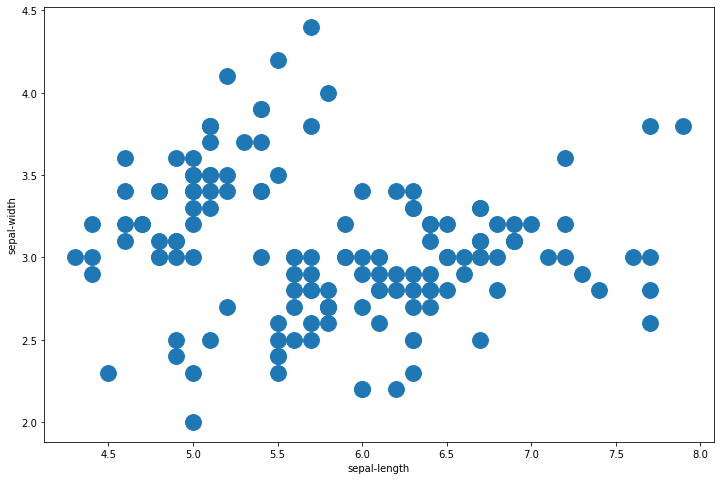

In [7]:
fig, ax = plt.subplots(figsize =(12,8))

plt.scatter(iris_df['sepal-length'], iris_df['sepal-width'], s=250)

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

Text(0, 0.5, 'petal-width')

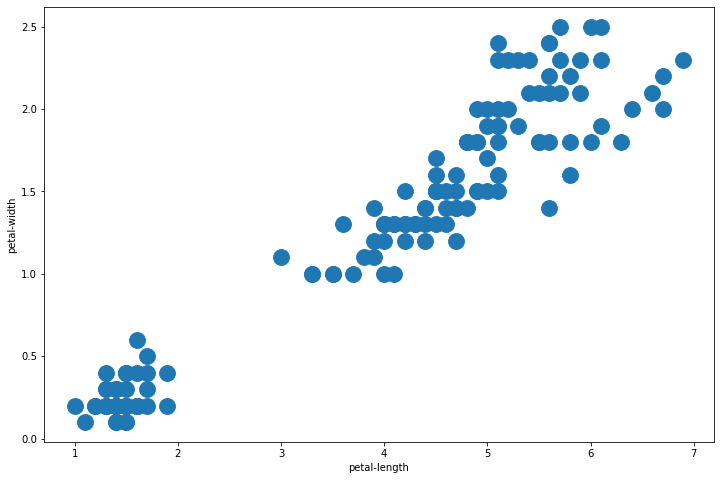

In [8]:
fig, ax = plt.subplots(figsize =(12,8))

plt.scatter(iris_df['petal-length'], iris_df['petal-width'], s=250)

plt.xlabel('petal-length')
plt.ylabel('petal-width')

Text(0, 0.5, 'petal-width')

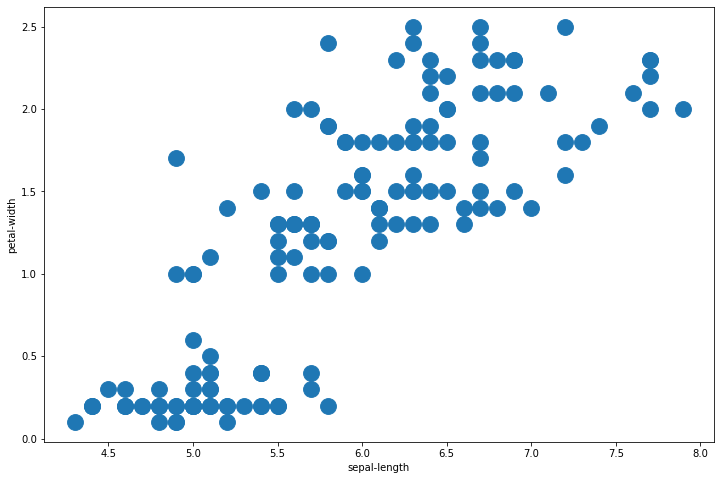

In [9]:
fig, ax = plt.subplots(figsize =(12,8))

plt.scatter(iris_df['sepal-length'], iris_df['petal-width'], s=250)

plt.xlabel('sepal-length')
plt.ylabel('petal-width')

In [10]:
iris_2D =iris_df[['sepal-length', 'petal-length']]

iris_2D.head()

,sepal-length,petal-length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [11]:
iris_2D.shape

(150, 2)

In [12]:
iris_2D = np.array(iris_2D)

kmeans_model_2D = KMeans(n_clusters = 3, max_iter = 1000).fit(iris_2D)

In [13]:
kmeans_model_2D.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [14]:
centriods_2D = kmeans_model_2D.cluster_centers_

centriods_2D

array([[5.00784314, 1.49215686],
       [6.83902439, 5.67804878],
       [5.87413793, 4.39310345]])

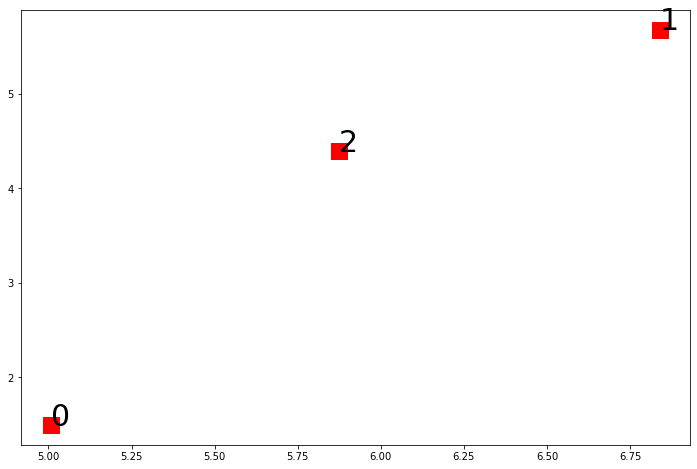

In [15]:
fig, ax = plt.subplots(figsize =(12,8))

plt.scatter(centriods_2D[:,0] , centriods_2D[:,1], s=250,c = 'r', marker = 's')

for i in range(len(centriods_2D)):
    plt.annotate(i, (centriods_2D[i][0], centriods_2D[i][1]), fontsize = 30)

In [16]:
iris_labels = iris_df['class']

In [17]:
print('Homogeniety score: ', metrics.homogeneity_score(iris_labels, kmeans_model_2D.labels_))

print('Completeness score: ', metrics.completeness_score(iris_labels, kmeans_model_2D.labels_))

print('V_measure score: ', metrics.v_measure_score(iris_labels, kmeans_model_2D.labels_))

print('Adjusted Rand score: ', metrics.adjusted_rand_score(iris_labels, kmeans_model_2D.labels_))

print('Adjusted Mutual Info score: ', metrics.adjusted_mutual_info_score(iris_labels, kmeans_model_2D.labels_))

print('Silhouette score: ', metrics.silhouette_score(iris_2D, kmeans_model_2D.labels_))

Homogeniety score:  0.7033177646052958
Completeness score:  0.7096993707802843
V_measure score:  0.706494157075837
Adjusted Rand score:  0.6988627672348092
Adjusted Mutual Info score:  0.702802453140913
Silhouette score:  0.5890584158017611


In [ ]:
colors = ['yellow', 'blue', 'green']

fig, ax = plt.subplots(figsize =(12,8))

plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], c = iris_df['class'], s =200,
           cmap = matplotlib.colors.ListedColormap(colors),alpha = 0.5)

plt.scatter(centriods_2D[:,0] , centriods_2D[:,1], s=250,c ='r', marker = 's')

for i in range(len(centriods_2D)):
    plt.annotate(i, (centriods_2D[i][0], centriods_2D[i][1]), fontsize = 30)

In [18]:
iris_features = iris_df.drop('class',axis =1)

iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
iris_labels = iris_df['class']

iris_labels.sample(5)

56    1
32    0
37    0
74    1
12    0
Name: class, dtype: object

In [25]:
kmeans_model = KMeans(n_clusters = 3).fit(iris_features)

In [26]:
kmeans_model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [27]:
kmeans_model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ]])

In [28]:
print('Homogeniety score: ', metrics.homogeneity_score(iris_labels, kmeans_model.labels_))

print('Completeness score: ', metrics.completeness_score(iris_labels, kmeans_model.labels_))

print('V_measure score: ', metrics.v_measure_score(iris_labels, kmeans_model.labels_))

print('Adjusted Rand score: ', metrics.adjusted_rand_score(iris_labels, kmeans_model.labels_))

print('Adjusted Mutual Info score: ', metrics.adjusted_mutual_info_score(iris_labels, kmeans_model.labels_))

print('Silhouette score: ', metrics.silhouette_score(iris_features, kmeans_model.labels_))

Homogeniety score:  0.7514854021988338
Completeness score:  0.7649861514489815
V_measure score:  0.7581756800057784
Adjusted Rand score:  0.7302382722834697
Adjusted Mutual Info score:  0.7551191675800484
Silhouette score:  0.5528190123564102
